In [1]:
import Ab as ab
import datetime as dt
import pandas as pd

#use east coast time zone
#sd = dt.datetime(2018,12,28) - dt.timedelta(days=7*14)
#ed = dt.datetime(2019,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2020,1,3) - dt.timedelta(days=7*15)
#ed = dt.datetime(2020,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2021,1,1) - dt.timedelta(days=7*15)
#ed = dt.datetime(2021,12,31) + dt.timedelta(days=1)
sd = dt.datetime(2018,4,10) - dt.timedelta(days=200)
ed = dt.datetime(2023,4,10) + dt.timedelta(days=1)

def get_data(name:str, sd, ed):
    d = ab.StockData(name)
    w = ab.StockData(name)
    d.get_data_from_yfinance(name, sd, ed, interval='1d')
    w.get_data_from_yfinance(name, sd, ed, interval='1wk')
    return d,w


ticker, ticker_weekly = get_data('TQQQ', sd, ed)
#set max number of rows to display
pd.set_option('display.max_rows', 1000)


GPU acceleration is available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:

#visually inspect data to make sure the weekly and daily data are aligned
ticker_joined = ticker.data[['Close']].merge(ticker_weekly.data[['Close']], how='left', left_index=True, right_index=True)
ticker_joined.tail(30)

,Close_x,Close_y
Date,,
2023-02-27,22.240000,NaN
2023-02-28,22.129999,NaN
2023-03-01,21.590000,NaN
2023-03-02,22.110001,NaN
2023-03-03,23.459999,23.459999
2023-03-06,23.559999,NaN
2023-03-07,22.680000,NaN
2023-03-08,22.990000,NaN
2023-03-09,21.780001,NaN


In [3]:
#Fast Stochastic Oscillator:
#Fast %K = %K basic calculation
#Fast %D = 5-period SMA of Fast %K
ticker.get_k('Close', 14)
ticker.get_ema('Close-K14', 5)

#Slow Stochastic Oscillator:
#Slow %K = 5-period EMA of Fast %K
#Slow %D = 5-period EMA of Slow %K
ticker.get_ema('Close-K14', 5)
ticker.get_ema('Close-K14-EMA5', 5)
ticker.data.rename(columns={'Close-K14-EMA5-EMA5':'D%D', 'Close-K14-EMA5':'D%K'}, inplace=True)



In [4]:
#Fast Stochastic Oscillator:
#Fast %K = %K basic calculation
#Fast %D = 5-period SMA of Fast %K
ticker_weekly.get_k('Close', 14)
ticker_weekly.get_ema('Close-K14', 5)

#Slow Stochastic Oscillator:
#Slow %K = 5-period EMA of Fast %K
#Slow %D = 5-period EMA of Slow %K
ticker_weekly.get_ema('Close-K14', 5)
ticker_weekly.get_ema('Close-K14-EMA5', 5)
#rename to %K and %D
ticker_weekly.data.rename(columns={'Close-K14-EMA5-EMA5':'W%D', 'Close-K14-EMA5':'W%K'}, inplace=True)


<Axes: xlabel='Date'>

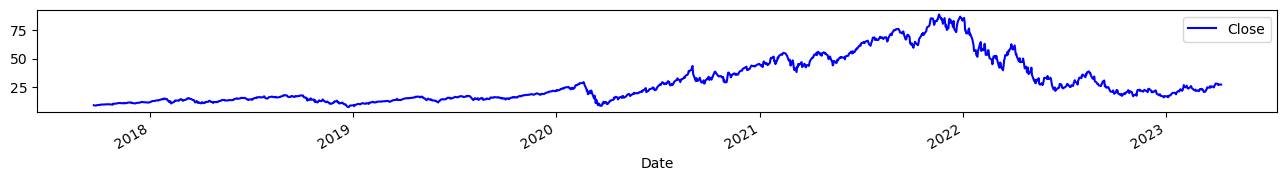

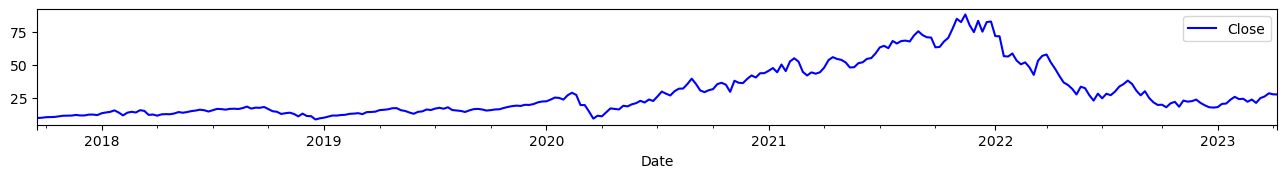

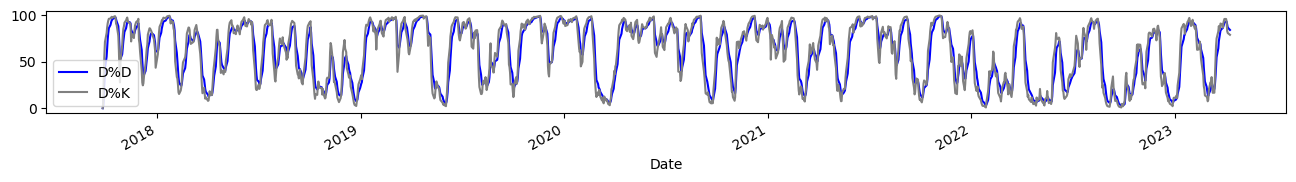

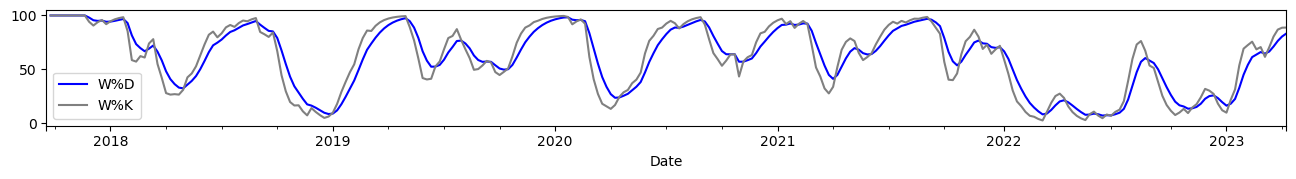

In [5]:
ticker.data.plot(y=['Close'], figsize=(16,1.5), sharey=True, color=['blue'])
ticker_weekly.data.plot(y=['Close'], figsize=(16,1.5), sharey=True, color=['blue'])
#plotting the slow stochastic oscillator with blue and green lines
ticker.data.plot(y=['D%D','D%K'], figsize=(16,1.5), sharey=True, color=['blue', 'grey'])
#plotting the slow stochastic oscillator with blue and green lines
ticker_weekly.data.plot(y=['W%D', 'W%K'], figsize=(16,1.5), sharey=True, color=['blue', 'grey'],)

In [6]:
test_start = dt.datetime(2018,4,10)
test_end =   dt.datetime(2023,4,10)
plot_start = dt.datetime(2018,4,10)
plot_end =   dt.datetime(2023,4,10)

In [7]:
#buy and hold
bah = ab.BuyAndHold(ticker)
#time the execution of the strategy
bah.run_strategy(ticker,test_start,test_end)

In [8]:

bah_bt = ab.BackTest()
bah_bt.run_backtest(bah,ticker,test_start,test_end)


<Ab.StockData object at 0x7f0c80526fe0>:
cumulative return      : 126.39%
compound anual return  : 17.7524%
max_drawdown           : -81.11%
sharp_ratio            : 3.81%
average of daily return: 0.1847%
std of daily return    : 4.8481%
number of trades       : 2,
trading days           : 1826,
batting Average        : 100.00%
Gain Average           : 126.39%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        
    Buy Date            Sell Date Ticker     Quant  Buy Price  Sell Price  \
0 2018-04-10  2023-04-10 00:00:00   TQQQ  0.082713      12.09   27.370001   

     Profit  Profit %  
0  1.263854  1.263854  


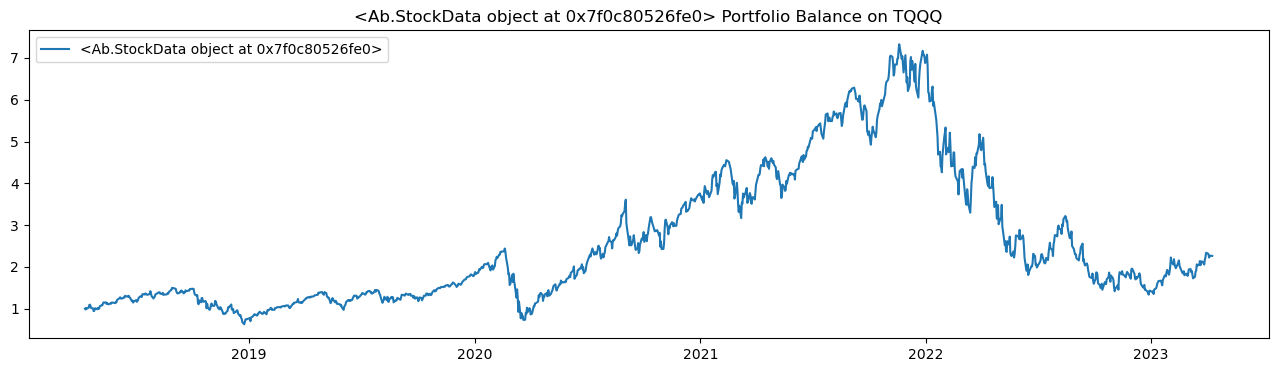

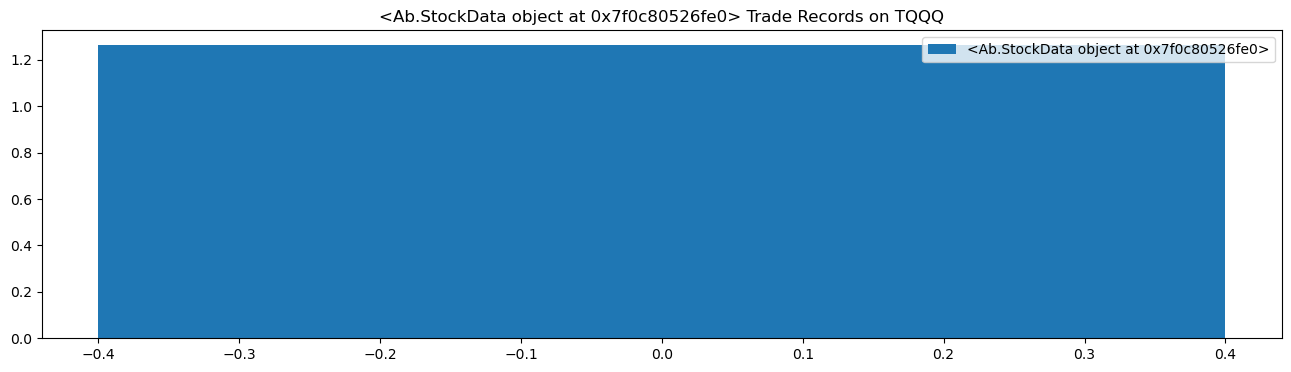

In [9]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()
print(bah_bt.trade_records)

In [10]:
stg = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, 0, 0, 0)
stg.run_strategy([ticker,ticker_weekly], test_start, test_end)
sc_bt = ab.BackTest()
sc_bt.run_backtest(stg,ticker,test_start,test_end)





StochasticCross:
cumulative return      : 90.47%
compound anual return  : 13.7531%
max_drawdown           : -65.43%
sharp_ratio            : 3.26%
average of daily return: 0.0891%
std of daily return    : 2.7383%
number of trades       : 23,
trading days           : 1826,
batting Average        : 45.45%
Gain Average           : 25.34%
Loss Average           : -11.63%
Risk Reward Ratio      : 2.18
Gain STD               : 18.33%
Loss STD               : 7.33%
        


,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %
0,2018-05-11,2018-10-05 00:00:00,TQQQ,0.072072,13.875000,16.187500,0.166667,0.166667
1,2019-01-04,2019-05-13 00:00:00,TQQQ,0.121941,9.567500,13.705000,0.504529,0.432454
2,2019-05-16,2019-05-17 00:00:00,TQQQ,0.110074,15.182500,14.710000,-0.052010,-0.031121
3,2019-06-21,2019-08-05 00:00:00,TQQQ,0.102237,15.837500,13.810000,-0.207286,-0.128019
4,2019-08-08,2019-08-09 00:00:00,TQQQ,0.090783,15.552500,15.092500,-0.041760,-0.029577
5,2019-09-13,2019-09-20 00:00:00,TQQQ,0.083955,16.320000,15.855000,-0.039039,-0.028493
6,2019-10-18,2020-02-24 00:00:00,TQQQ,0.083207,15.997500,23.920000,0.659206,0.495234
7,2020-04-17,2020-04-21 00:00:00,TQQQ,0.119305,16.682501,14.357500,-0.277384,-0.139368
8,2020-04-27,2020-06-11 00:00:00,TQQQ,0.103235,16.592501,20.750000,0.429198,0.250565
9,2020-06-18,2020-09-03 00:00:00,TQQQ,0.091106,23.512501,36.932499,1.222637,0.570760


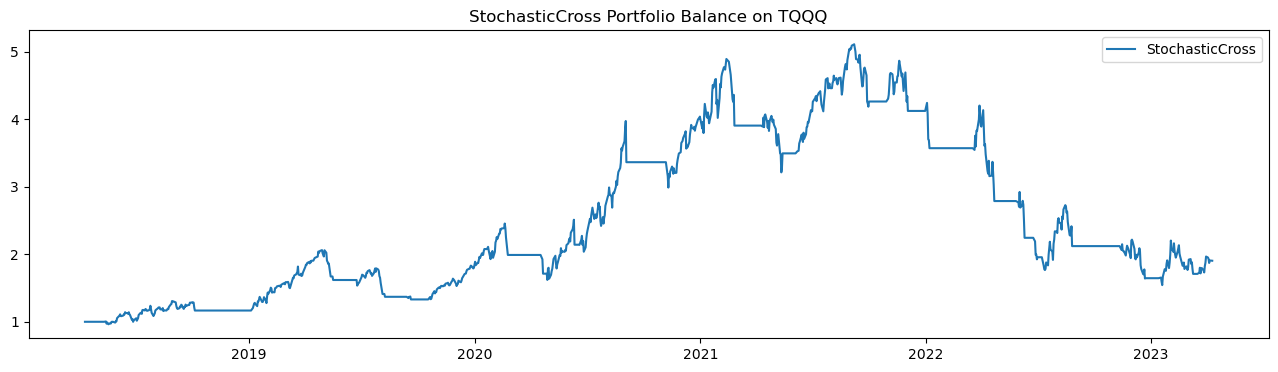

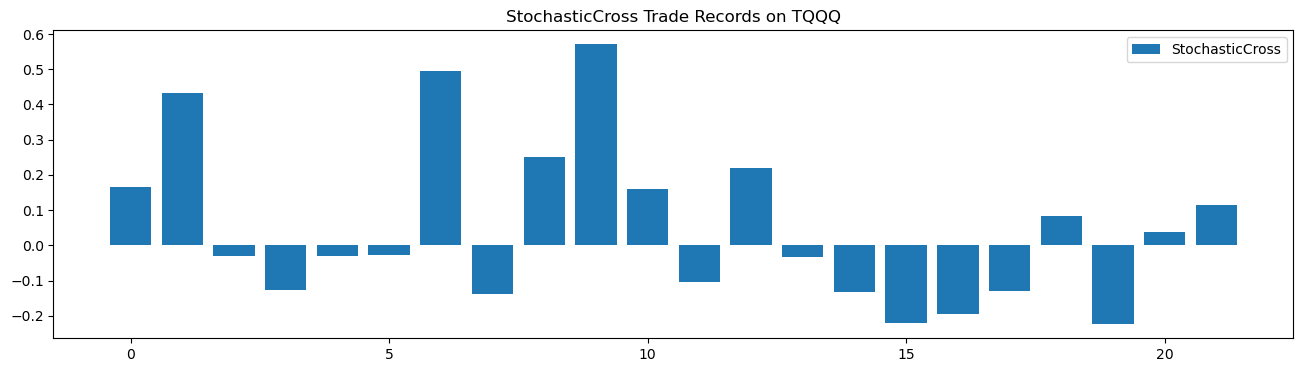

In [11]:
sc_bt.plot_balance()
sc_bt.plot_records()
sc_bt.performance_summary()
sc_bt.trade_records


Index(['TQQQ', 'Weekday', 'Signal_x', 'Cash', 'Stock', 'Total', 'Margin',
       'Trade', 'Buy Price', 'Profit', 'DClose', 'D%K', 'D%D', 'WClose', 'W%K',
       'W%D', '13WMAX', '13WMIN', '14WMAX', '14WMIN', 'WD%Fast-K', 'WD%K',
       'WD%D', 'W%K-UP', 'WD%K-UP', 'Signal_y'],
      dtype='object')


,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %
0,2018-05-11,2018-10-05 00:00:00,TQQQ,0.072072,13.875000,16.187500,0.166667,0.166667
1,2019-01-04,2019-05-13 00:00:00,TQQQ,0.121941,9.567500,13.705000,0.504529,0.432454
2,2019-05-16,2019-05-17 00:00:00,TQQQ,0.110074,15.182500,14.710000,-0.052010,-0.031121
3,2019-06-21,2019-08-05 00:00:00,TQQQ,0.102237,15.837500,13.810000,-0.207286,-0.128019
4,2019-08-08,2019-08-09 00:00:00,TQQQ,0.090783,15.552500,15.092500,-0.041760,-0.029577
5,2019-09-13,2019-09-20 00:00:00,TQQQ,0.083955,16.320000,15.855000,-0.039039,-0.028493
6,2019-10-18,2020-02-24 00:00:00,TQQQ,0.083207,15.997500,23.920000,0.659206,0.495234
7,2020-04-17,2020-04-21 00:00:00,TQQQ,0.119305,16.682501,14.357500,-0.277384,-0.139368
8,2020-04-27,2020-06-11 00:00:00,TQQQ,0.103235,16.592501,20.750000,0.429198,0.250565
9,2020-06-18,2020-09-03 00:00:00,TQQQ,0.091106,23.512501,36.932499,1.222637,0.570760


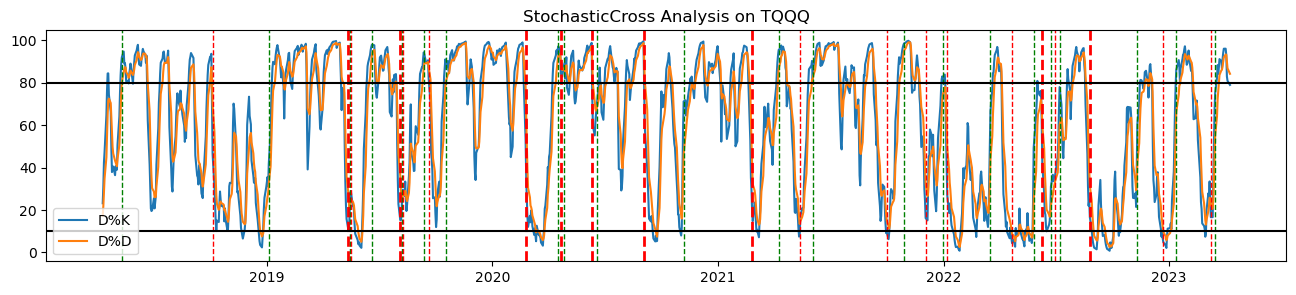

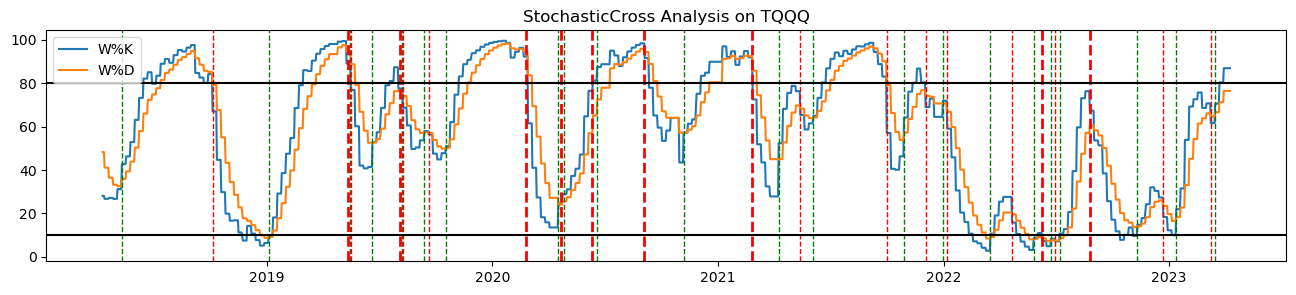

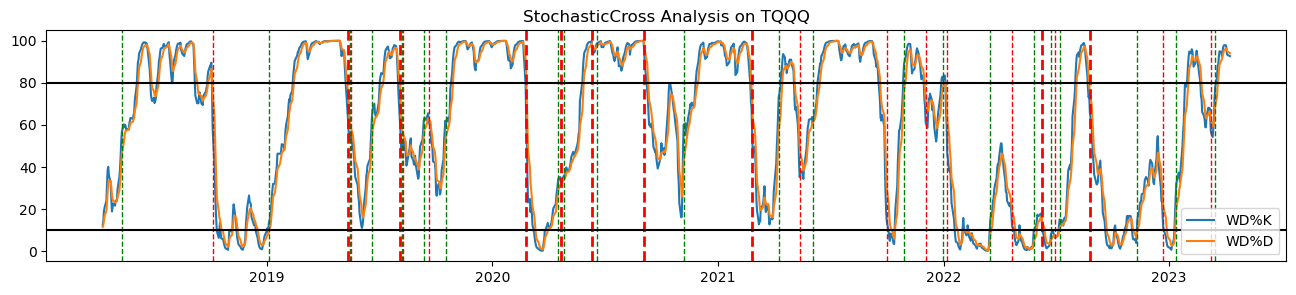

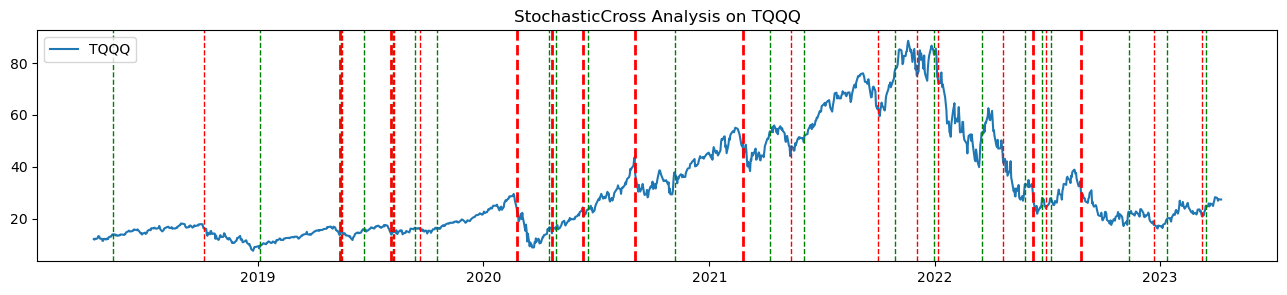

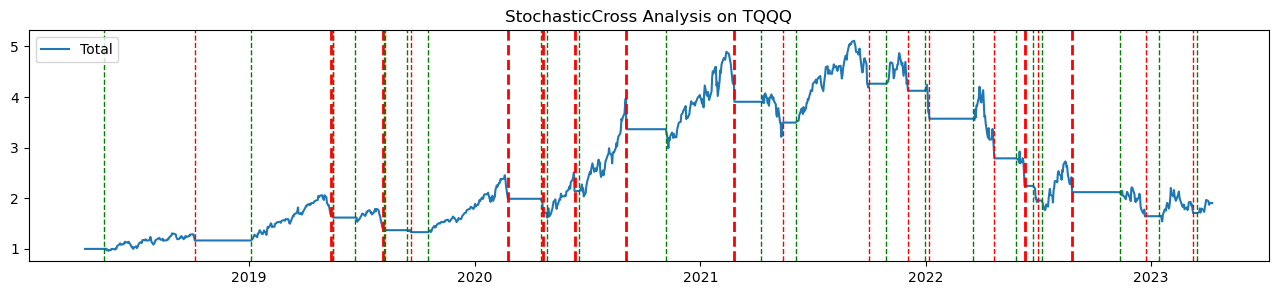

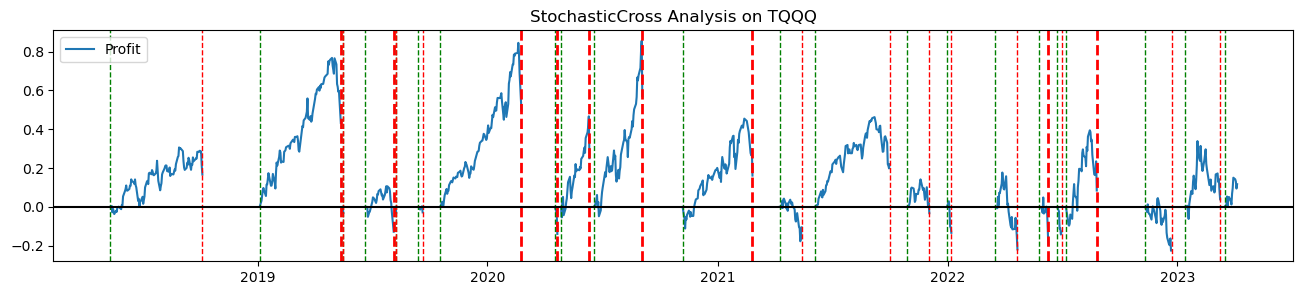

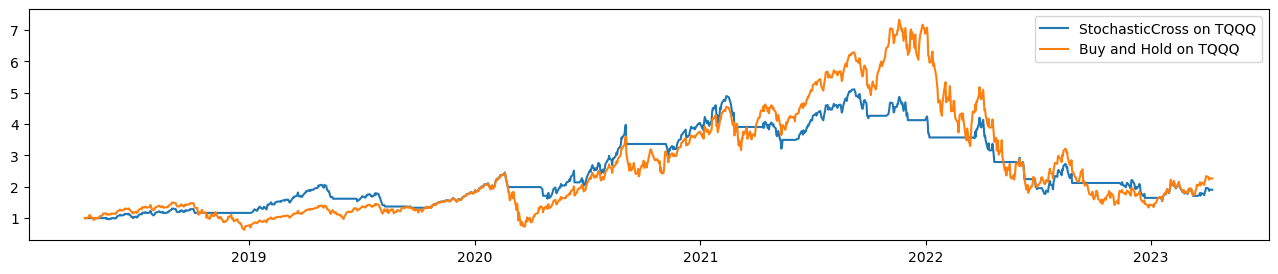

In [12]:
print(sc_bt.joined_data.columns)
sc_bt.plot_joined_data(['D%K','D%D'], plot_start, plot_end, ydash_low=stg.oversold, ydash_high=stg.overbought)
sc_bt.plot_joined_data(['W%K','W%D'], plot_start, plot_end, ydash_low=stg.oversold, ydash_high=stg.overbought)
sc_bt.plot_joined_data(['WD%K','WD%D'], plot_start, plot_end, ydash_low=stg.oversold, ydash_high=stg.overbought)
sc_bt.plot_joined_data([ticker.ticker], plot_start, plot_end)
sc_bt.plot_joined_data(['Total'], plot_start, plot_end)
sc_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3))
plt.plot(sc_bt.balance.index, sc_bt.balance['Total'], label = '{} on {}'.format(sc_bt.name, ticker.ticker))
plt.plot(bah_bt.balance.index, bah_bt.balance['Total'], label = 'Buy and Hold on {} '.format(ticker.ticker))
plt.legend()
sc_bt.trade_records


StochasticCross:
cumulative return      : 345.99%
compound anual return  : 34.8545%
max_drawdown           : -70.67%
sharp_ratio            : 5.39%
average of daily return: 0.1681%
std of daily return    : 3.1194%
number of trades       : 49,
trading days           : 1826,
batting Average        : 43.75%
Gain Average           : 20.48%
Loss Average           : -7.58%
Risk Reward Ratio      : 2.70
Gain STD               : 20.20%
Loss STD               : 4.78%
        
Index(['TQQQ', 'Weekday', 'Signal_x', 'Cash', 'Stock', 'Total', 'Margin',
       'Trade', 'Buy Price', 'Profit', 'DClose', 'D%K', 'D%D', 'WClose', 'W%K',
       'W%D', '13WMAX', '13WMIN', '14WMAX', '14WMIN', 'WD%Fast-K', 'WD%K',
       'WD%D', 'W%K-UP', 'WD%K-UP', 'Signal_y'],
      dtype='object')


,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %
0,2018-04-10,2018-04-23 00:00:00,TQQQ,0.082713,12.090000,12.195833,0.008754,0.008754
1,2018-05-04,2018-06-27 00:00:00,TQQQ,0.078819,12.798333,13.872500,0.084665,0.083930
2,2018-07-06,2018-08-01 00:00:00,TQQQ,0.071606,15.270000,15.567500,0.021303,0.019483
3,2018-08-03,2018-09-07 00:00:00,TQQQ,0.068252,16.332500,16.517500,0.012627,0.011327
4,2018-09-20,2018-10-04 00:00:00,TQQQ,0.064753,17.410000,16.820000,-0.038204,-0.033889
5,2018-10-31,2018-11-12 00:00:00,TQQQ,0.083443,13.052500,12.227500,-0.068841,-0.063206
6,2018-11-27,2018-12-04 00:00:00,TQQQ,0.089168,11.442500,11.857500,0.037005,0.036268
7,2018-12-26,2019-05-09 00:00:00,TQQQ,0.117937,8.965000,15.242500,0.740351,0.700223
8,2019-06-07,2019-08-02 00:00:00,TQQQ,0.128016,14.042500,15.430000,0.177622,0.098807
9,2019-08-19,2019-08-23 00:00:00,TQQQ,0.127995,15.432500,13.945000,-0.190392,-0.096388


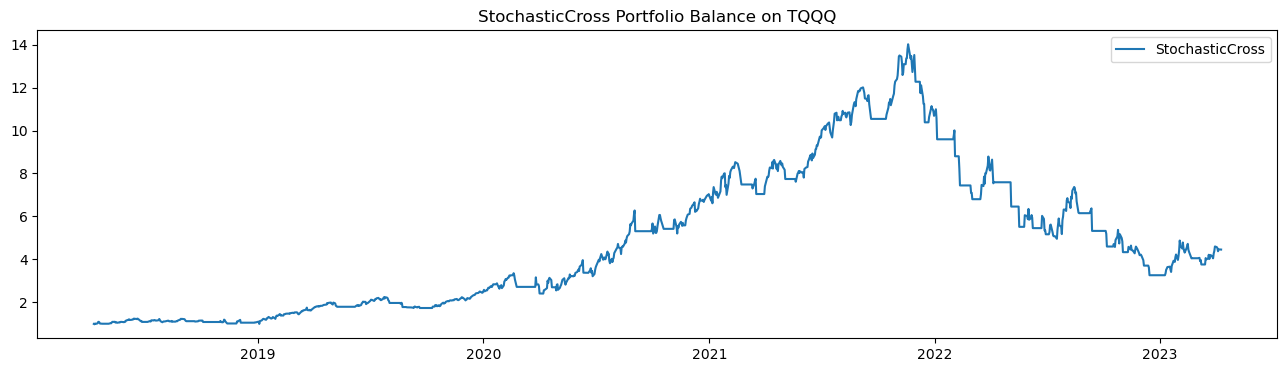

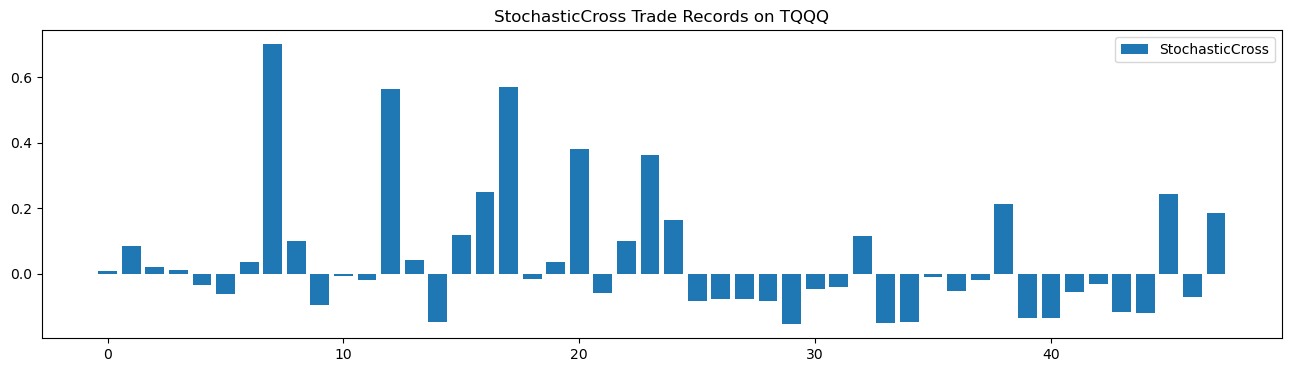

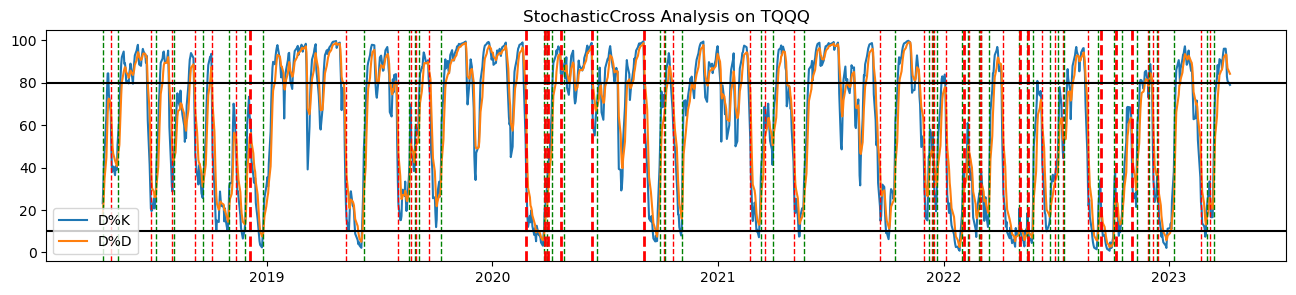

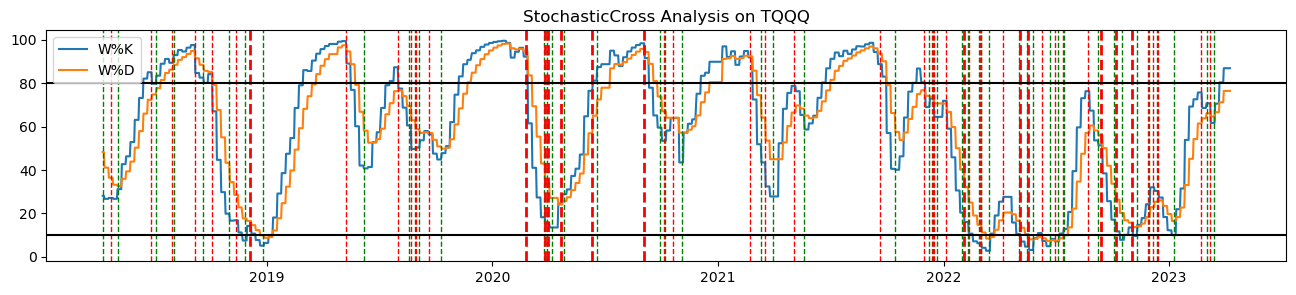

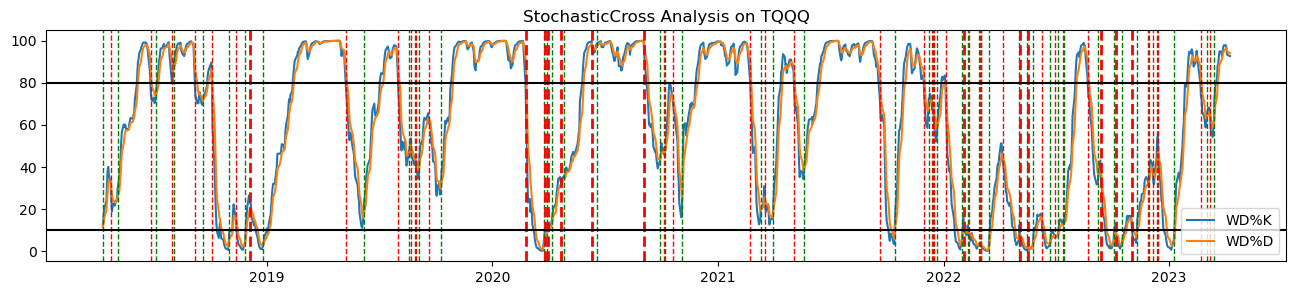

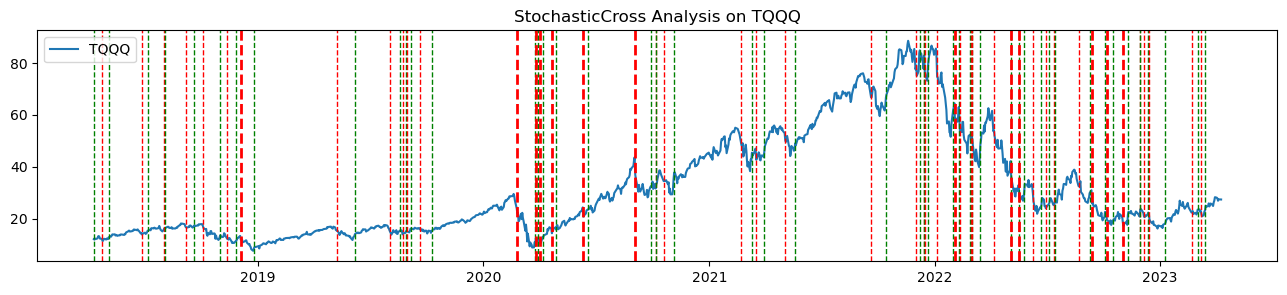

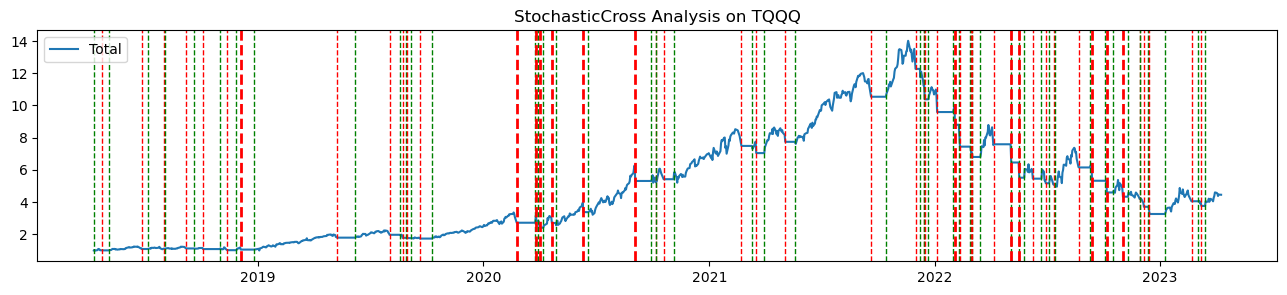

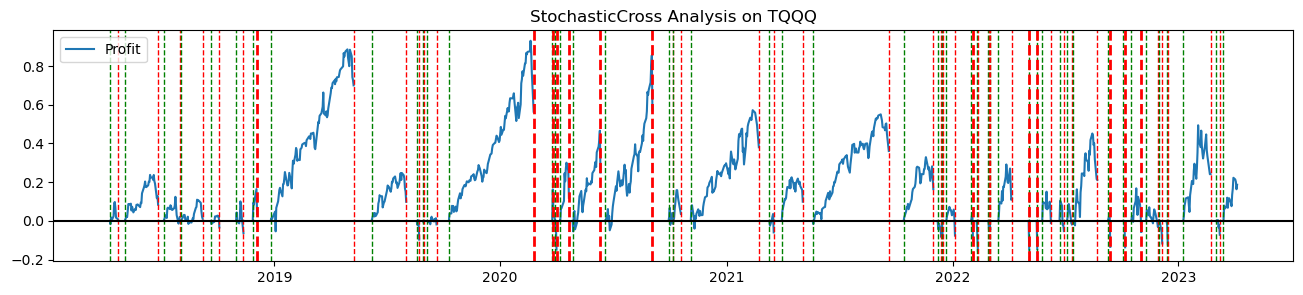

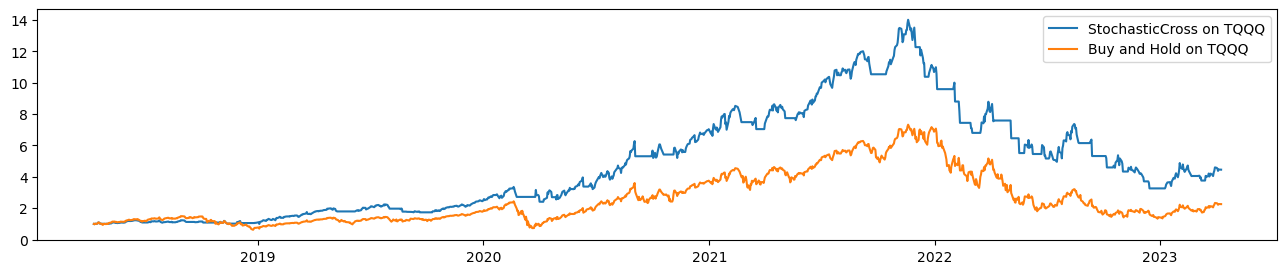

In [13]:
stg = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, 0, 0, 3)
stg.run_strategy([ticker,ticker_weekly], test_start, test_end)
sc_bt = ab.BackTest()
sc_bt.run_backtest(stg,ticker,test_start,test_end)
sc_bt.plot_balance()
sc_bt.plot_records()
sc_bt.performance_summary()
print(sc_bt.joined_data.columns)
sc_bt.plot_joined_data(['D%K','D%D'], plot_start, plot_end, ydash_low=stg.oversold, ydash_high=stg.overbought)
sc_bt.plot_joined_data(['W%K','W%D'], plot_start, plot_end, ydash_low=stg.oversold, ydash_high=stg.overbought)
sc_bt.plot_joined_data(['WD%K','WD%D'], plot_start, plot_end, ydash_low=stg.oversold, ydash_high=stg.overbought)
sc_bt.plot_joined_data([ticker.ticker], plot_start, plot_end)
sc_bt.plot_joined_data(['Total'], plot_start, plot_end)
sc_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 3))
plt.plot(sc_bt.balance.index, sc_bt.balance['Total'], label = '{} on {}'.format(sc_bt.name, ticker.ticker))
plt.plot(bah_bt.balance.index, bah_bt.balance['Total'], label = 'Buy and Hold on {} '.format(ticker.ticker))
plt.legend()
sc_bt.trade_records


StochasticCross:
cumulative return      : 132.46%
compound anual return  : 18.3771%
max_drawdown           : -42.71%
sharp_ratio            : 4.00%
average of daily return: 0.0964%
std of daily return    : 2.4071%
number of trades       : 28,
trading days           : 1826,
batting Average        : 37.04%
Gain Average           : 21.10%
Loss Average           : -5.48%
Risk Reward Ratio      : 3.85
Gain STD               : 18.86%
Loss STD               : 3.34%
        


,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %
0,2018-04-10,2018-04-23 00:00:00,TQQQ,0.082713,12.090000,12.195833,0.008754,0.008754
1,2018-05-04,2018-06-27 00:00:00,TQQQ,0.078819,12.798333,13.872500,0.084665,0.083930
2,2018-07-06,2018-08-01 00:00:00,TQQQ,0.071606,15.270000,15.567500,0.021303,0.019483
3,2018-08-03,2018-09-07 00:00:00,TQQQ,0.068252,16.332500,16.517500,0.012627,0.011327
4,2018-09-20,2018-10-04 00:00:00,TQQQ,0.064753,17.410000,16.820000,-0.038204,-0.033889
5,2018-10-31,2018-11-12 00:00:00,TQQQ,0.083443,13.052500,12.227500,-0.068841,-0.063206
6,2018-11-27,2018-12-04 00:00:00,TQQQ,0.089168,11.442500,11.857500,0.037005,0.036268
7,2018-12-26,2019-05-09 00:00:00,TQQQ,0.117937,8.965000,15.242500,0.740351,0.700223
8,2019-06-07,2019-08-02 00:00:00,TQQQ,0.128016,14.042500,15.430000,0.177622,0.098807
9,2019-08-19,2019-08-23 00:00:00,TQQQ,0.127995,15.432500,13.945000,-0.190392,-0.096388


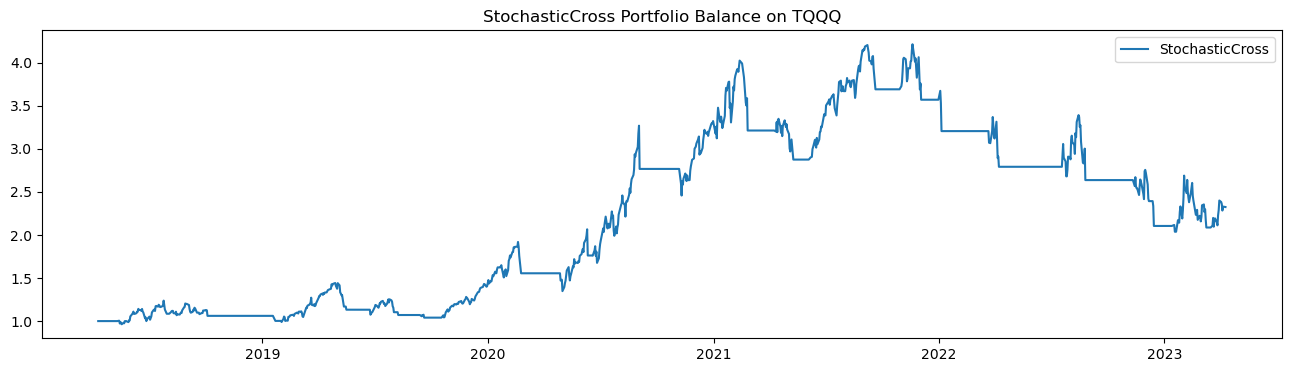

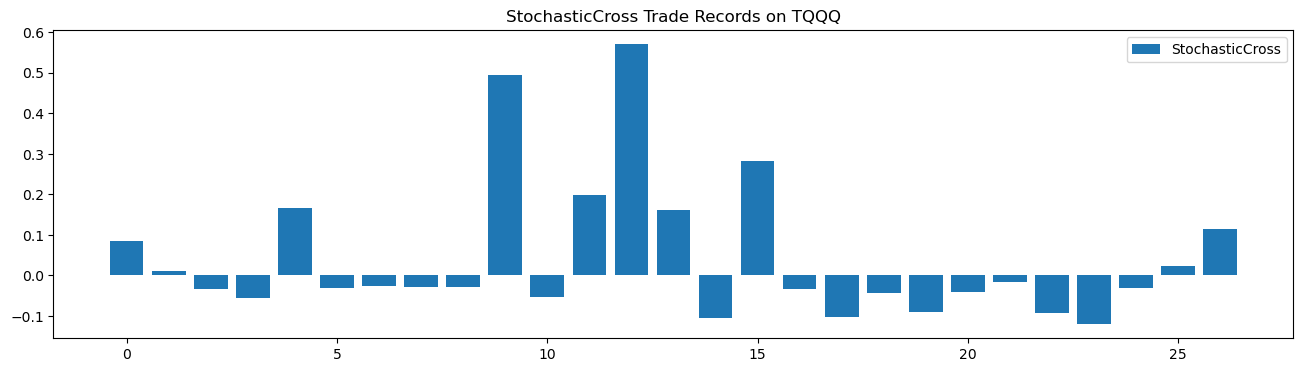

In [14]:
stg_50ma = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, var=3, ma_notrade=50)
stg_50ma.run_strategy([ticker,ticker_weekly], test_start, test_end)
stg_50ma_bt = ab.BackTest()
stg_50ma_bt.run_backtest(stg_50ma,ticker,test_start,test_end)
stg_50ma_bt.plot_balance()
stg_50ma_bt.plot_records()
stg_50ma_bt.performance_summary()
sc_bt.trade_records

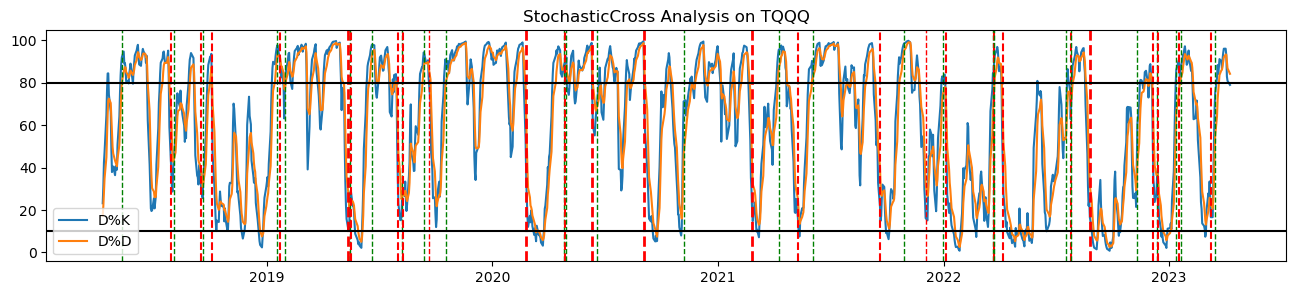

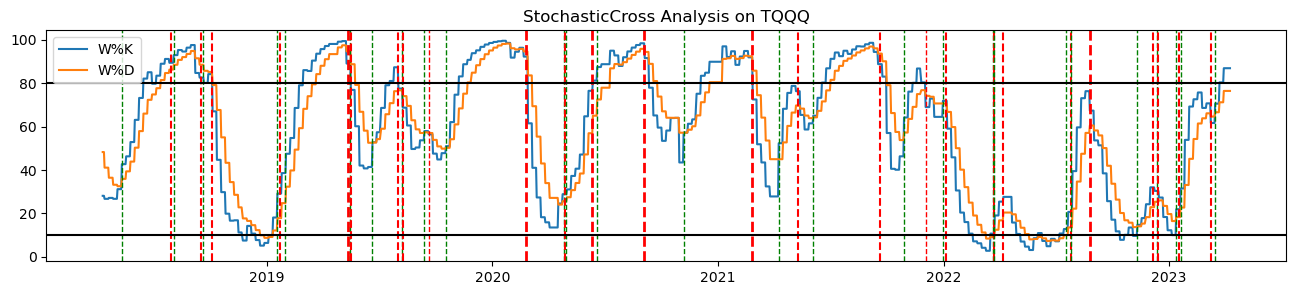

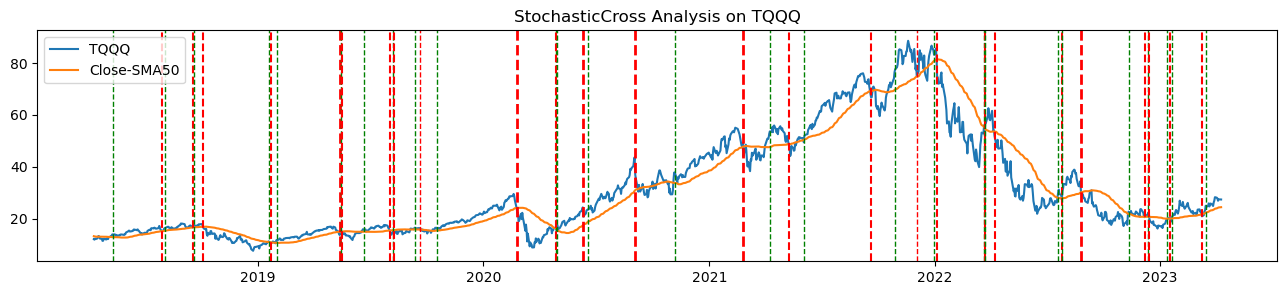

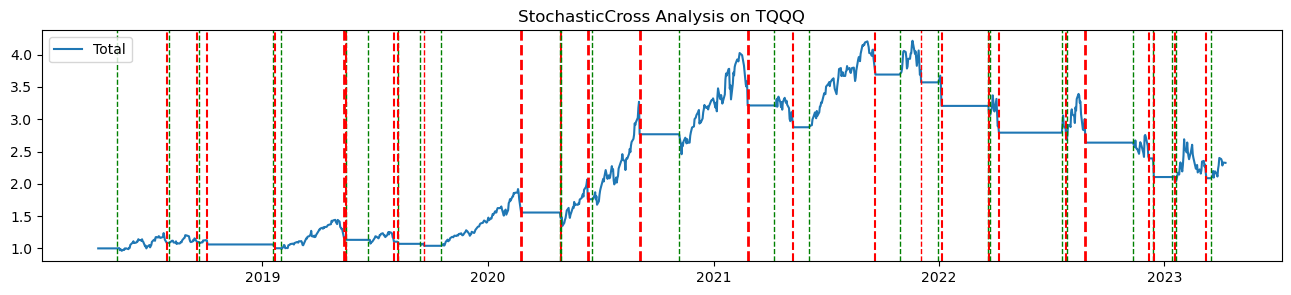

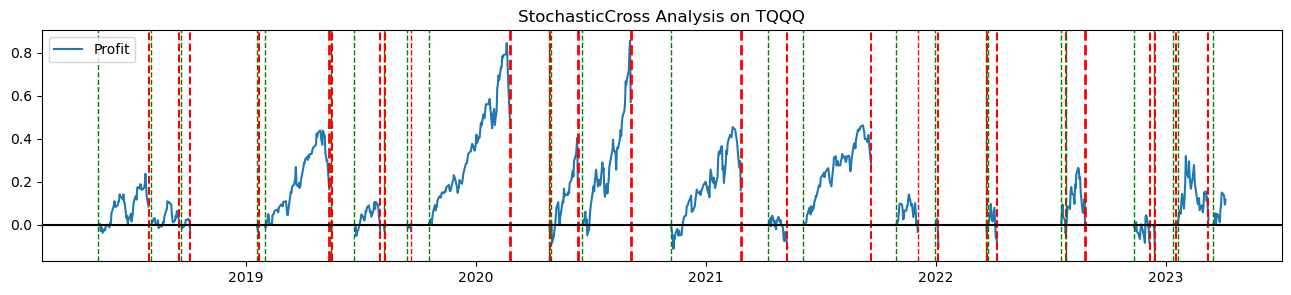

In [15]:
stg_50ma_bt.plot_joined_data(['D%K','D%D'], plot_start, plot_end, ydash_low=stg_50ma.oversold, ydash_high=stg_50ma.overbought)
stg_50ma_bt.plot_joined_data(['W%K','W%D'], plot_start, plot_end, ydash_low=stg_50ma.oversold, ydash_high=stg_50ma.overbought)
stg_50ma_bt.plot_joined_data([ticker.ticker, 'Close-SMA50'], plot_start, plot_end)
stg_50ma_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_50ma_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)


StochasticCross:
cumulative return      : 121.23%
compound anual return  : 17.2107%
max_drawdown           : -35.45%
sharp_ratio            : 4.12%
average of daily return: 0.0846%
std of daily return    : 2.0515%
number of trades       : 19,
trading days           : 1826,
batting Average        : 36.84%
Gain Average           : 25.77%
Loss Average           : -5.92%
Risk Reward Ratio      : 4.35
Gain STD               : 19.45%
Loss STD               : 4.17%
        


,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %
0,2018-04-10,2018-04-23 00:00:00,TQQQ,0.082713,12.090000,12.195833,0.008754,0.008754
1,2018-05-04,2018-06-27 00:00:00,TQQQ,0.078819,12.798333,13.872500,0.084665,0.083930
2,2018-07-06,2018-08-01 00:00:00,TQQQ,0.071606,15.270000,15.567500,0.021303,0.019483
3,2018-08-03,2018-09-07 00:00:00,TQQQ,0.068252,16.332500,16.517500,0.012627,0.011327
4,2018-09-20,2018-10-04 00:00:00,TQQQ,0.064753,17.410000,16.820000,-0.038204,-0.033889
5,2018-10-31,2018-11-12 00:00:00,TQQQ,0.083443,13.052500,12.227500,-0.068841,-0.063206
6,2018-11-27,2018-12-04 00:00:00,TQQQ,0.089168,11.442500,11.857500,0.037005,0.036268
7,2018-12-26,2019-05-09 00:00:00,TQQQ,0.117937,8.965000,15.242500,0.740351,0.700223
8,2019-06-07,2019-08-02 00:00:00,TQQQ,0.128016,14.042500,15.430000,0.177622,0.098807
9,2019-08-19,2019-08-23 00:00:00,TQQQ,0.127995,15.432500,13.945000,-0.190392,-0.096388


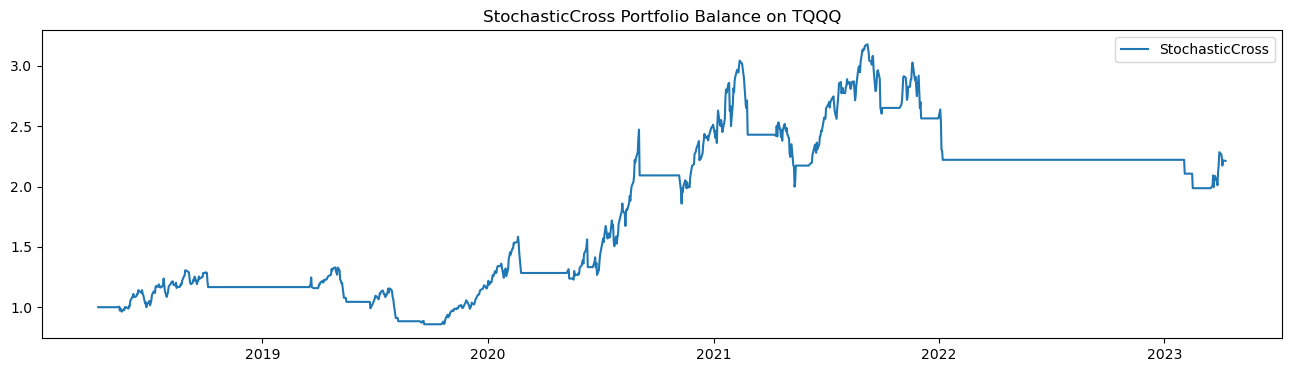

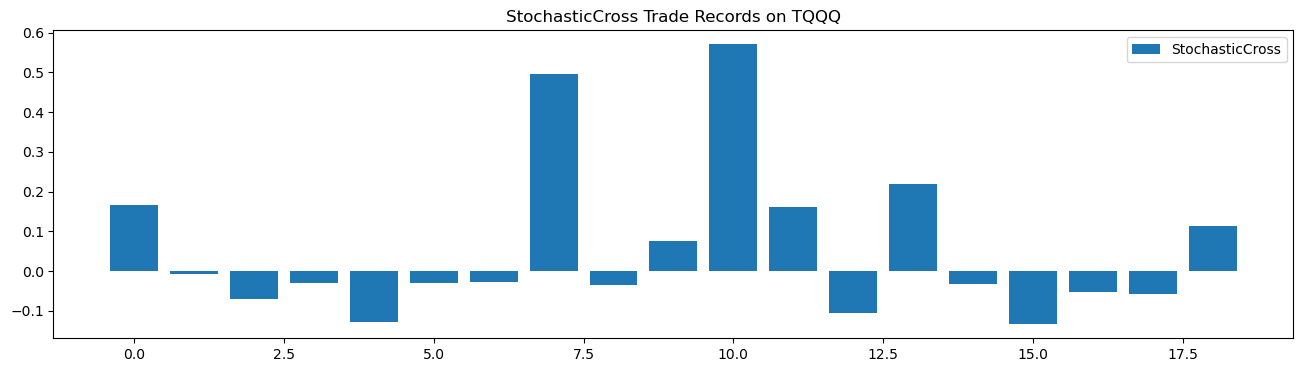

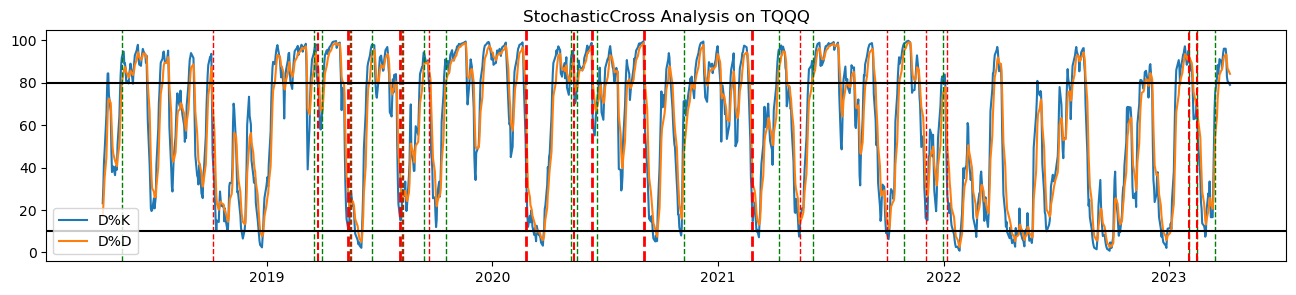

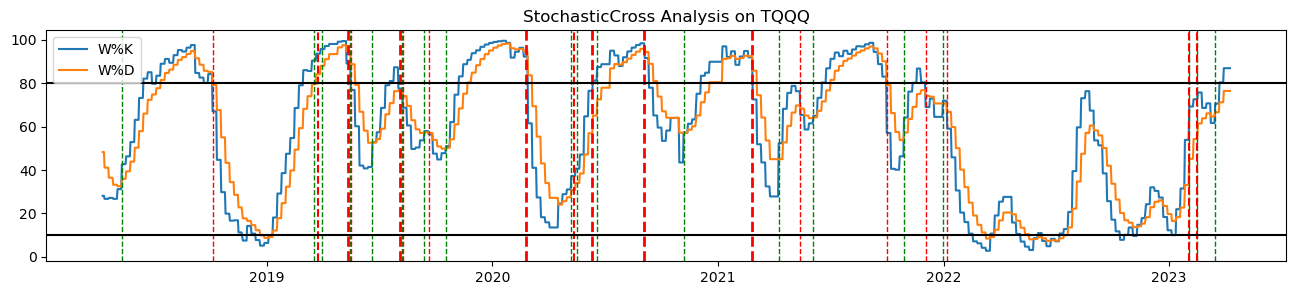

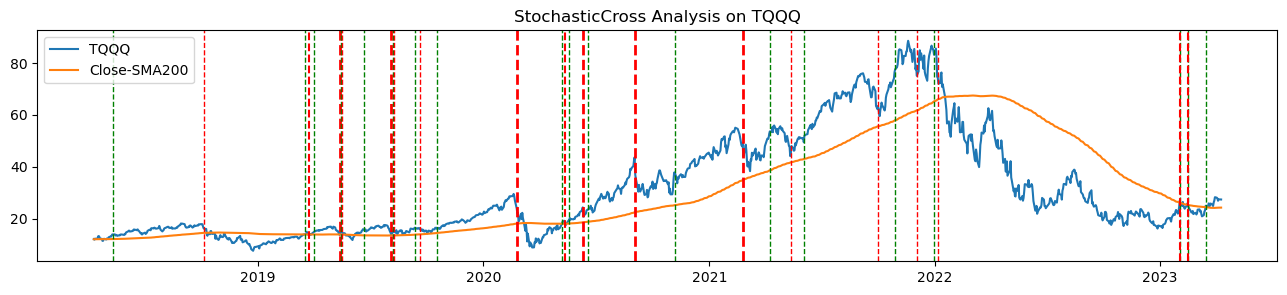

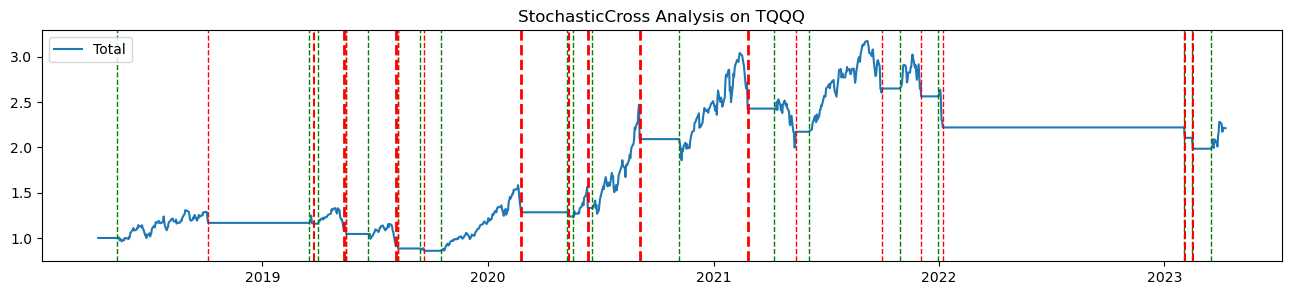

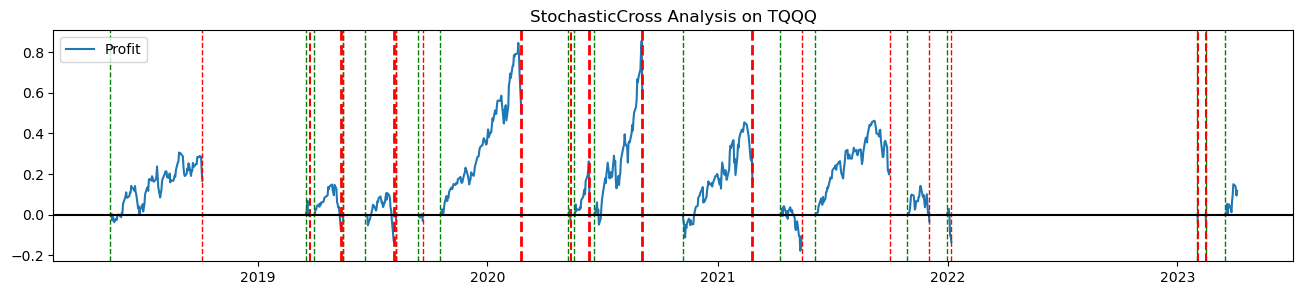

In [16]:
stg_200ma = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, ma_notrade=200)
stg_200ma.run_strategy([ticker,ticker_weekly], test_start, test_end)

stg_200ma_bt = ab.BackTest()
stg_200ma_bt.run_backtest(stg_200ma,ticker,test_start,test_end)

stg_200ma_bt.plot_balance()
stg_200ma_bt.plot_records()
stg_200ma_bt.performance_summary()

stg_200ma_bt.plot_joined_data(['D%K','D%D'], plot_start, plot_end, ydash_low=stg_200ma.oversold, ydash_high=stg_200ma.overbought)
stg_200ma_bt.plot_joined_data(['W%K','W%D'], plot_start, plot_end, ydash_low=stg_200ma.oversold, ydash_high=stg_200ma.overbought)
stg_200ma_bt.plot_joined_data([ticker.ticker,'Close-SMA200'], plot_start, plot_end)
stg_200ma_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_200ma_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)
sc_bt.trade_records